In [1]:
from pprint import pprint as prt
import string
from string import digits
import re
from nltk.tokenize import word_tokenize,sent_tokenize
from collections import defaultdict as dd
import gensim
from gensim import corpora
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.manifold import  TSNE

In [2]:
#opening the document 
#used first few chapters of "NIDNIGHT CHILDREN" and converting in lower case letters
file = open(r"C:\Users\mishr\MIDNIGHT CHILDREN.txt",).read()
midnight= file.lower().replace("\n"," ").replace("-","").replace("'s",'').replace("'",'')

In [3]:
# Removing Digits
dig = str.maketrans('', '', digits) 
story = midnight.translate(dig) 
story

'i was born in the city of bombay… once upon a time. no, that wont do, there no getting away from the date: i was born in doctor narlikar nursing home on august th, . and the time? the time matters, too. well then: at night. no, it important to be more… on the stroke of midnight, as a matter of fact. clockhands joined palms in respectful greeting as i came. oh, spell it out, spell it out: at the precise instant of india arrival at independence, i tumbled forth into the world. there were gasps. and, outside the window, fireworks and crowds. a few seconds later, my father broke his big toe; but ms accident was a mere trifle when set beside what had befallen me in that benighted moment, because thanks to the occult tyrannies of those blandly saluting clocks i had been mysteriously handcuffed to history, my destinies indissolubly chained to those of my country. for the next three decades, there was to be no escape. soothsayers had prophesied me, newspapers celebrated my arrival, politicos 

In [4]:
stopwords=['i','me','my','myself','we','our','ours','ourselves','you',"you're","you've","you'll","you'd",'your',
           'yours','yourself','yourselves','he','him','his','himself','she',"she's",'her','hers','herself','it',
           "it's",'its','itself','they','them','their','theirs','themselves','what','which','who','whom','this',
           'that',"that'll",'these','how','these','those','am','is','are','was','were','be','been','being','have',
           'has','had','having','do','does','did','done','doing','a','an','the','and','but','if','or','because',
           'as','until','while','of','at','by','for','with','about','against','between','into','through','during',
           'before','after','above','below','to','from','up','down','in','out','on','off','further','then','once',
           'here','there','when','where','why','how','all','any','both','each','few','more','most','other','some',
           'such','no','nor','not','only','own','same','so','than','too','very','s','t','can','will','just','don',
           "don't",'should',"should've",'now','d','ll','m','o','re','ve','y','ain','aren',"aren't",'couldn',"couldn't",
           'didn',"didn't",'doesn',"doesn't",'hadn',"hadn't",'hasn',"hasn't",'haven',"haven't",'isn',"isn't",'ma','mightn',
           "mightn't",'mustn',"mustn't",'needn',"needn't",'shan',"shan't",'shouldn',"shouldn't",'wasn',"wasn't",'weren',
           "weren't",'won',"won't",'wouldn',"wouldn't","won't", "What's",'although','bit',"i've",'much','more',"there's",
           "You've",'got',"i'd",'moreover','would','could','like','mr.','but',"i'm",'get','ought',"'",'onto','ive','must',
           'went','many','whats','id','let','yet','im','thatll','theyre','youll',"n't", "'s",'oh',"'ll",'th','..']

In [5]:
p=string.punctuation
print('\nNO OF PUNCTUATIONS:-',len(p),'\nPUNCTUATIONS:-\t',p)


NO OF PUNCTUATIONS:- 32 
PUNCTUATIONS:-	 !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [6]:
#word tokenization 
token= word_tokenize(story)

In [7]:
#removing stop words and punctuations
midnight=[]

for i in token:
    if i not in p:
        if i not in stopwords:
            midnight.append(i)

In [8]:
print("No of Tokenized word found-",len(token),
     "\nNo of Words after removing stopwords-",len(midnight),
     "\nNo of words dropped-", len(token)-len(midnight))

No of Tokenized word found- 23244 
No of Words after removing stopwords- 10309 
No of words dropped- 12935


In [9]:
print(midnight)

['born', 'city', 'bombay…', 'upon', 'time', 'wont', 'getting', 'away', 'date', 'born', 'doctor', 'narlikar', 'nursing', 'home', 'august', 'time', 'time', 'matters', 'well', 'night', 'important', 'more…', 'stroke', 'midnight', 'matter', 'fact', 'clockhands', 'joined', 'palms', 'respectful', 'greeting', 'came', 'spell', 'spell', 'precise', 'instant', 'india', 'arrival', 'independence', 'tumbled', 'forth', 'world', 'gasps', 'outside', 'window', 'fireworks', 'crowds', 'seconds', 'later', 'father', 'broke', 'big', 'toe', 'ms', 'accident', 'mere', 'trifle', 'set', 'beside', 'befallen', 'benighted', 'moment', 'thanks', 'occult', 'tyrannies', 'blandly', 'saluting', 'clocks', 'mysteriously', 'handcuffed', 'history', 'destinies', 'indissolubly', 'chained', 'country', 'next', 'three', 'decades', 'escape', 'soothsayers', 'prophesied', 'newspapers', 'celebrated', 'arrival', 'politicos', 'ratified', 'authenticity', 'left', 'entirely', 'without', 'say', 'matter', 'saleem', 'sinai', 'later', 'variousl

In [10]:
#selecting words with
word_count = dd(int)
for i in midnight:
        word_count[i] += 1
        
print(word_count)

defaultdict(<class 'int'>, {'born': 5, 'city': 8, 'bombay…': 1, 'upon': 14, 'time': 36, 'wont': 2, 'getting': 7, 'away': 20, 'date': 1, 'doctor': 80, 'narlikar': 1, 'nursing': 1, 'home': 16, 'august': 1, 'matters': 3, 'well': 16, 'night': 16, 'important': 6, 'more…': 1, 'stroke': 4, 'midnight': 1, 'matter': 5, 'fact': 2, 'clockhands': 1, 'joined': 3, 'palms': 1, 'respectful': 2, 'greeting': 3, 'came': 14, 'spell': 3, 'precise': 2, 'instant': 2, 'india': 10, 'arrival': 4, 'independence': 1, 'tumbled': 2, 'forth': 1, 'world': 15, 'gasps': 1, 'outside': 8, 'window': 9, 'fireworks': 1, 'crowds': 2, 'seconds': 1, 'later': 10, 'father': 18, 'broke': 3, 'big': 13, 'toe': 2, 'ms': 11, 'accident': 2, 'mere': 3, 'trifle': 2, 'set': 8, 'beside': 5, 'befallen': 1, 'benighted': 1, 'moment': 6, 'thanks': 2, 'occult': 1, 'tyrannies': 1, 'blandly': 1, 'saluting': 1, 'clocks': 2, 'mysteriously': 1, 'handcuffed': 1, 'history': 10, 'destinies': 1, 'indissolubly': 1, 'chained': 1, 'country': 1, 'next': 4,

In [11]:
# Only keep words that appear more than once
midnight_corpus=[]
for key ,value in word_count.items():
    if value>1:
        midnight_corpus.append(key)

In [12]:
print("NO OF WORDS FOUND:",len(midnight_corpus))

NO OF WORDS FOUND: 1507


In [13]:
print(midnight_corpus)

['born', 'city', 'upon', 'time', 'wont', 'getting', 'away', 'doctor', 'home', 'matters', 'well', 'night', 'important', 'stroke', 'matter', 'fact', 'joined', 'respectful', 'greeting', 'came', 'spell', 'precise', 'instant', 'india', 'arrival', 'tumbled', 'world', 'outside', 'window', 'crowds', 'later', 'father', 'broke', 'big', 'toe', 'ms', 'accident', 'mere', 'trifle', 'set', 'beside', 'moment', 'thanks', 'clocks', 'history', 'next', 'three', 'decades', 'escape', 'celebrated', 'left', 'entirely', 'without', 'say', 'saleem', 'sinai', 'called', 'sniffer', 'even', 'become', 'times', 'dangerous', 'sort', 'couldnt', 'nose', 'however', 'use', 'running', 'soon', 'thirtyone', 'years', 'old', 'perhaps', 'body', 'hope', 'saving', 'life', 'count', 'thousand', 'work', 'fast', 'scheherazade', 'end', 'admit', 'things', 'fear', 'stories', 'tell', 'lives', 'events', 'places', 'rumours', 'know', 'one', 'inside', 'guided', 'memory', 'large', 'white', 'bedsheet', 'hole', 'seven', 'inches', 'diameter', 'cu

In [14]:
#creating dictionary
midnight_dictionary = corpora.Dictionary([midnight_corpus])
print(midnight_dictionary)

Dictionary(1507 unique tokens: ['aadam', 'abdullah', 'able', 'abroad', 'absence']...)


In [15]:
#as the dictionary is created we can check it along with the unique number allocated to it

dict_refr=midnight_dictionary.token2id
dict_refr

{'aadam': 0,
 'abdullah': 1,
 'able': 2,
 'abroad': 3,
 'absence': 4,
 'accident': 5,
 'accompanied': 6,
 'according': 7,
 'acharya': 8,
 'acquired': 9,
 'across': 10,
 'actually': 11,
 'add': 12,
 'admit': 13,
 'affair': 14,
 'afraid': 15,
 'afternoon': 16,
 'afterwards': 17,
 'again': 18,
 'age': 19,
 'ago': 20,
 'agra': 21,
 'agree': 22,
 'air': 23,
 'air…': 24,
 'akin': 25,
 'alia': 26,
 'alien': 27,
 'allah': 28,
 'alleyway': 29,
 'almost': 30,
 'alone': 31,
 'along': 32,
 'already': 33,
 'also': 34,
 'always': 35,
 'amma': 36,
 'among': 37,
 'amongst': 38,
 'amritsar': 39,
 'anarchists': 40,
 'ancient': 41,
 'anger': 42,
 'angrily': 43,
 'angry': 44,
 'ankles': 45,
 'announced': 46,
 'another': 47,
 'answer': 48,
 'answered': 49,
 'anyone': 50,
 'anything': 51,
 'apart': 52,
 'appearance': 53,
 'appeared': 54,
 'appearing': 55,
 'applied': 56,
 'approaching': 57,
 'april': 58,
 'arm': 59,
 'armpit': 60,
 'arms': 61,
 'army': 62,
 'around': 63,
 'arrival': 64,
 'arrive': 65,
 'arr

**WORD2VEC**

In [16]:
sentences = sent_tokenize(story)
tokens=[]
for i in sentences:
    tokens.append(word_tokenize(i))
print("No of Tokenized list of word found-",len(tokens))

No of Tokenized list of word found- 1172


In [17]:
# Training the Word2Vec model
model = Word2Vec(tokens,min_count=1)
words = model.wv.vocab

In [18]:
# Testing the word vectors
vector = model.wv['afterwards']
print(vector)

[ 0.00959125 -0.01155154 -0.00036236  0.01261005  0.00709614 -0.00974937
  0.01093788 -0.0205098   0.01243591 -0.02986209  0.00784356 -0.01417281
 -0.02240844 -0.02198678 -0.01661793 -0.02190565 -0.00128793 -0.01307679
 -0.00608379  0.00020764 -0.00255758  0.0269595   0.00215265 -0.00541355
 -0.00452401 -0.00229936 -0.03753215  0.02694459  0.0054004  -0.02805874
 -0.01262564 -0.00904321 -0.00346598 -0.01067724 -0.00596877 -0.0048585
  0.00385494  0.00728647 -0.00068105 -0.04217725  0.00159271 -0.00362467
 -0.0276198  -0.00847406  0.00501276 -0.0087617  -0.02400664 -0.01244332
 -0.00133122  0.0033892   0.00239296  0.00279026  0.02102969  0.00953219
  0.00907963  0.02210542  0.01792434 -0.01281653 -0.03940259  0.02182591
 -0.02346105 -0.00942968  0.03499163  0.00262691 -0.01520913 -0.0135301
  0.00594603  0.00197056 -0.02194751 -0.00867526 -0.00368201  0.00139205
 -0.03905912  0.00120131  0.00460263  0.01151652 -0.00816053  0.00948148
  0.01294653  0.01675891  0.00906719  0.01225633  0.0

In [19]:
#finding similar words
sample=['hunched','pointed','plenty','gift','prescribed','compassionate','existence','boatman','fisherman','friendship',
       'filthiness','turquoise','sunlight','acquired','fluid','political','guns','muslim','breaking','outhouse',
       'campus','waxed','dusty','nagging','witch','magical','summoned','bride','urchins','melodramatic']
print("TEST WORDS:",len(sample))

TEST WORDS: 30


In [20]:
for i in sample:
    similar_word= model.wv.most_similar(i,topn=3)
    print('similar words of ',i.upper(),'\n','--'*10, '\n')
    print(similar_word)
    print("\n")

similar words of  HUNCHED 
 -------------------- 

[('leather', 0.9879052042961121), ('right', 0.9877195358276367), ('lake', 0.9876885414123535)]


similar words of  POINTED 
 -------------------- 

[('lime', 0.9743504524230957), ('run', 0.9730672836303711), ('feel', 0.9724034667015076)]


similar words of  PLENTY 
 -------------------- 

[('helpless', 0.9103779196739197), ('betel', 0.908673882484436), ('louder', 0.9077383279800415)]


similar words of  GIFT 
 -------------------- 

[('poet', 0.9679180383682251), ('im', 0.9676203727722168), ('hitthespittoon', 0.9671709537506104)]


similar words of  PRESCRIBED 
 -------------------- 

[('itching', 0.9842832088470459), ('nothing', 0.9842588901519775), ('cant', 0.9839338660240173)]


similar words of  COMPASSIONATE 
 -------------------- 

[('vick', 0.8590704202651978), ('grand', 0.8567894697189331), ('rage', 0.8565669059753418)]


similar words of  EXISTENCE 
 -------------------- 

[('least', 0.9006295800209045), ('louder', 0.900373399

**SIMILARITY**

In [21]:
model.wv.similarity(w1='midnight',w2='midnight')

1.0

In [22]:
sample1=['hunched','pointed','plenty','photographer','gift','prescribed','compassionate','existence','boatman','fisherman','friendship',
       'filthiness','turquoise','sunlight','acquired','victim','optimists','rickshaws','fluid','political','guns','muslim','breaking','outhouse',
       'campus','waxed','dusty','nagging','sleep','human','food','invisible','witch','magical','summoned','bride','guns','circumstances','urchins','melodramatic']
print("TEST WORDS:",len(sample1))

TEST WORDS: 40


In [23]:
words = []
vectors = []
x= []
y = []

for i in sample1:
    vectors.append(model[i])  #it'll add the vector representation of the word to the list specified
    words.append(i)       #it'll simly add the word to the list specified
    
tsne_model = TSNE(perplexity=3, n_components=3, init='pca', random_state=42)
coordinates = tsne_model.fit_transform(vectors)
for value in coordinates:
    x.append(value[0])
    y.append(value[1])

<ipython-input-23-82c0e10754af>:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vectors.append(model[i])  #it'll add the vector representation of the word to the list specified


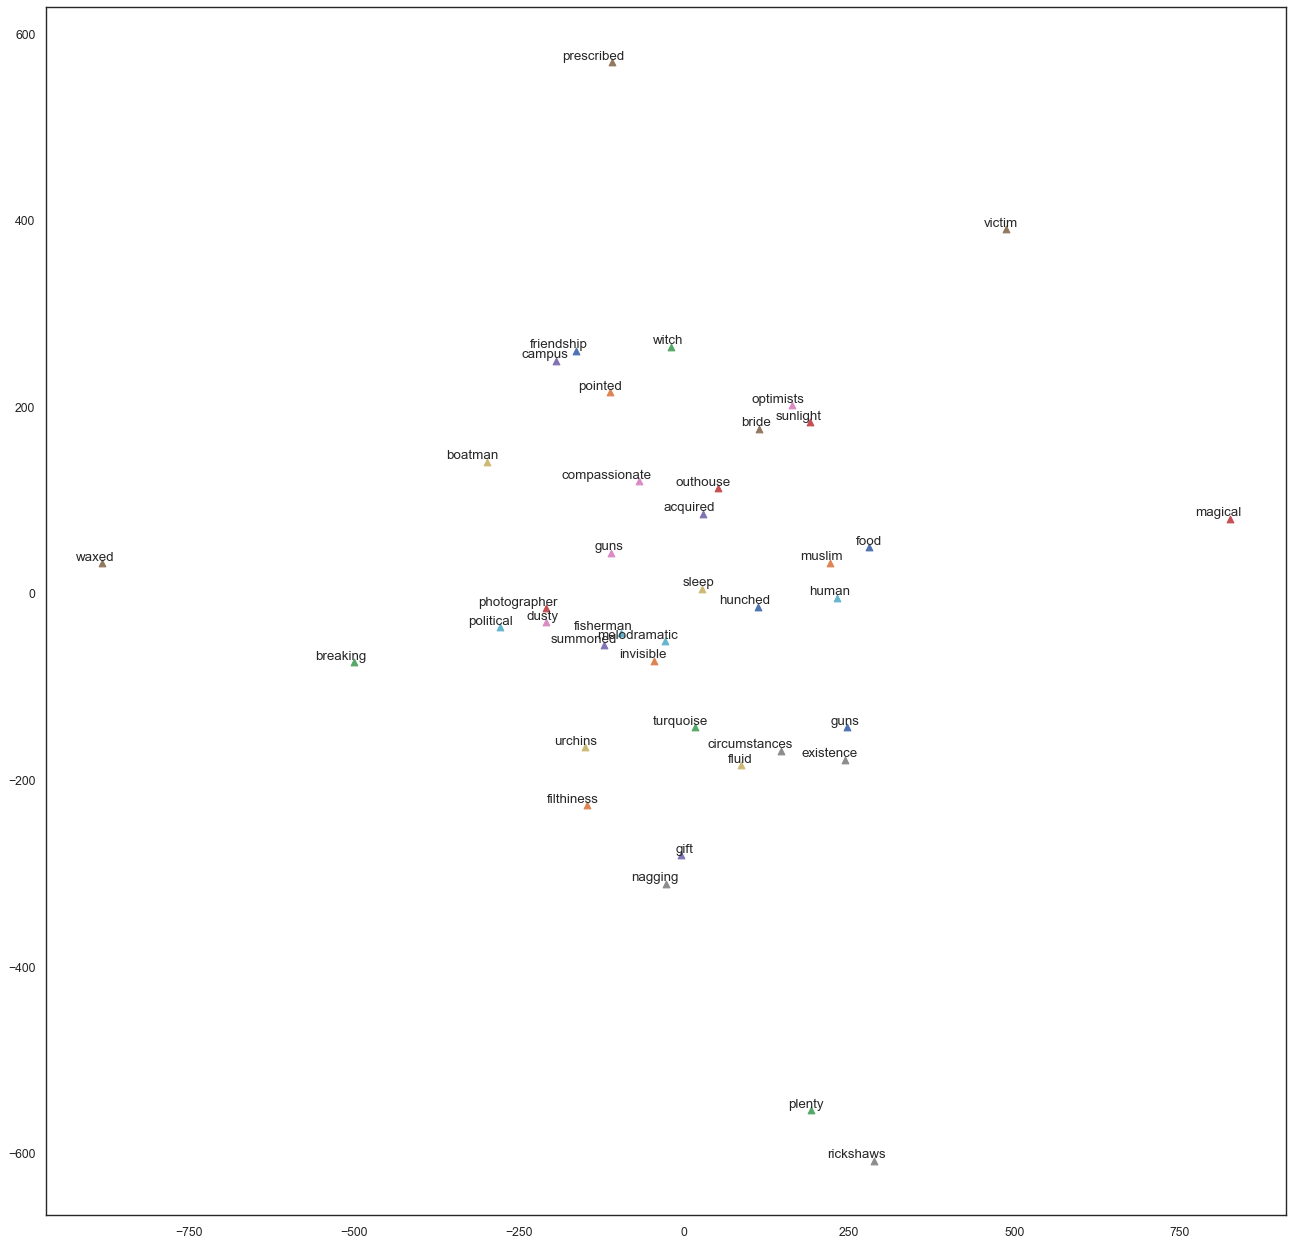

In [24]:
plt.figure(figsize=(20,20),dpi=80)
sns.set_context('poster',font_scale=4)
sns.set(style='white')
for i in range(len(x)):
    plt.scatter(x[i],y[i],marker='^')
    plt.annotate(words[i],xy=(x[i], y[i]),xytext=(11,11),textcoords='offset points',
            horizontalalignment='right', verticalalignment='top')
plt.show()
    
